In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Lichess Data Analysis

In [2]:
games = pd.read_csv("games.csv", index_col=0)
pd.set_option("display.max_rows", 10)

In [3]:
games['created_at'] = pd.to_datetime(games['created_at'], unit='ms')
games['last_move_at'] = pd.to_datetime(games['last_move_at'], unit='ms')

games.drop(columns=['moves'], inplace=True)
games.drop(columns=['opening_ply'], inplace=True)

In [4]:
games.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name
id,,,,,,,,,,,,,
TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation
l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation
mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation


In [5]:
games['duration'] = games['last_move_at'] - games['created_at']
games['duration'].describe()

count                        20058
mean     0 days 00:14:29.707049606
std      0 days 01:20:14.222090938
min                0 days 00:00:00
25%                0 days 00:00:00
50%         0 days 00:04:00.612000
75%         0 days 00:13:13.171250
max         7 days 00:17:24.701000
Name: duration, dtype: object

In [6]:
games['year'] = games['created_at'].dt.year
games.groupby('year')['duration'].mean()

year
2013   0 days 00:15:03.273018867
2014   0 days 00:19:59.018324921
2015   0 days 00:14:49.770403395
2016   0 days 00:16:31.689600055
2017   0 days 00:13:25.785714893
Name: duration, dtype: timedelta64[ns]

In [7]:
games['created_at'] = pd.to_datetime(games['created_at'], unit='ms')
games['last_move_at'] = pd.to_datetime(games['last_move_at'], unit='ms')

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20058 entries, TZJHLljE to N8G2JHGG
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   rated           20058 non-null  bool           
 1   created_at      20058 non-null  datetime64[ns] 
 2   last_move_at    20058 non-null  datetime64[ns] 
 3   turns           20058 non-null  int64          
 4   victory_status  20058 non-null  object         
 5   winner          20058 non-null  object         
 6   increment_code  20058 non-null  object         
 7   white_id        20058 non-null  object         
 8   white_rating    20058 non-null  int64          
 9   black_id        20058 non-null  object         
 10  black_rating    20058 non-null  int64          
 11  opening_eco     20058 non-null  object         
 12  opening_name    20058 non-null  object         
 13  duration        20058 non-null  timedelta64[ns]
 14  year            20058 non-null  i

In [9]:
games.shape

(20058, 15)

In [10]:
games.head(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,duration,year
id,,,,,,,,,,,,,,,
TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,0 days,2017
l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,0 days,2017
mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,0 days,2017


In [11]:
games.tail(3)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,duration,year
id,,,,,,,,,,,,,,,
yrAas0Kj,True,2017-07-10 14:44:37.493,2017-07-10 14:47:30.327,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,D00,Queen's Pawn Game: Mason Attack,0 days 00:02:52.834000,2017
b0v4tRyF,True,2017-07-10 14:15:27.019,2017-07-10 14:31:13.718,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,B07,Pirc Defense,0 days 00:15:46.699000,2017
N8G2JHGG,True,2017-07-09 23:32:32.649,2017-07-09 23:44:49.348,78,mate,black,10+0,jamboger,1235,ffbob,1339,D00,Queen's Pawn Game: Mason Attack,0 days 00:12:16.699000,2017


In [12]:
games.isnull().sum()

rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
                 ..
black_rating      0
opening_eco       0
opening_name      0
duration          0
year              0
Length: 15, dtype: int64

In [13]:
games.duplicated().sum()

np.int64(429)

In [14]:
games.drop_duplicates(inplace=True)

In [15]:
games.duplicated().sum()

np.int64(0)

In [16]:
top_openings = games["opening_name"].value_counts()
top_openings

opening_name
Van't Kruijs Opening                                                    363
Sicilian Defense                                                        353
Sicilian Defense: Bowdler Attack                                        294
French Defense: Knight Variation                                        265
Scotch Game                                                             264
                                                                       ... 
Queen's Gambit Refused: Baltic Defense |  Queen Attack                    1
Polish Opening: King's Indian Variation |  Schiffler Attack               1
Queen's Gambit Declined: Semi-Tarrasch Defense |  Exchange Variation      1
Sicilian Defense: Spielmann Variation                                     1
King's Indian Defense: Orthodox Variation |  Glek Defense                 1
Name: count, Length: 1477, dtype: int64

In [17]:
games.year.value_counts()

year
2017    13550
2016     3620
2015     1226
2014     1180
2013       53
Name: count, dtype: int64

In [18]:
games.sort_values(by="turns").head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,duration,year
id,,,,,,,,,,,,,,,
458qPV3q,False,2017-08-23 18:47:09.547,2017-08-23 18:47:21.125,1,resign,white,10+25,lance5500,2621,antons,1614,A40,Queen's Pawn,0 days 00:00:11.578000,2017
cbsKbsCn,False,2016-06-08 01:40:00.000,2016-06-08 01:40:00.000,1,outoftime,white,5+15,slowgamer,2100,ytdvvc,1404,B00,King's Pawn,0 days 00:00:00,2016
8uS7Lt5i,True,2017-09-03 00:50:03.537,2017-09-03 00:50:05.459,1,resign,black,10+0,networkchess2,1878,kaskade24,1860,A00,Mieses Opening,0 days 00:00:01.922000,2017
pgZ12eMH,False,2017-07-20 16:05:35.886,2017-07-20 16:06:06.956,1,outoftime,white,10+20,lance5500,2621,xxcrunchypebblexx,1324,A40,Queen's Pawn,0 days 00:00:31.070000,2017
rAO6oybn,False,2016-12-04 05:40:00.000,2016-12-04 05:40:00.000,1,outoftime,white,5+5,ranchowangdu,1500,justicebot,2723,B00,King's Pawn,0 days 00:00:00,2016


In [19]:
games['mean_rating'] = games[['white_rating', 'black_rating']].min(axis=1)
games.sort_values('mean_rating', inplace=True)
games.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,duration,year,mean_rating
id,,,,,,,,,,,,,,,,
YwaFfXra,True,2017-06-22 00:06:40.000,2017-06-22 00:06:40.000,61,mate,white,10+0,ragnarlothbrook_spb,784,joe-brown,970,C40,King's Knight Opening,0 days 00:00:00,2017,784
XJoTQFBp,True,2017-07-30 20:02:08.493,2017-07-30 20:02:12.384,2,resign,black,10+0,crazyscientist1,784,tahsinkayas,1006,C20,King's Pawn Game,0 days 00:00:03.891000,2017,784
APnsyoV7,False,2014-06-10 18:44:38.638,2014-06-10 19:03:39.080,27,resign,black,20+12,lucatiel-of-mirrah,788,val4,1307,A04,Zukertort Opening: Queen's Gambit Invitation,0 days 00:19:00.442000,2014,788
516BT5yk,True,2017-07-30 20:02:42.933,2017-07-30 20:18:22.321,120,resign,black,10+0,martinlutherking,1450,crazyscientist1,789,B21,Sicilian Defense: McDonnell Attack,0 days 00:15:39.388000,2017,789
WRNkn1iH,True,2017-06-29 07:06:40.000,2017-06-29 07:06:40.000,74,resign,black,14+12,mccheese,989,hortense,791,D00,Blackmar-Diemer Gambit,0 days 00:00:00,2017,791


In [20]:
games.groupby("mean_rating")["turns"].mean().sort_values()

mean_rating
830       2.0
832       2.0
834       2.0
863       2.0
867       2.0
        ...  
2276    161.0
891     171.0
2190    178.0
2158    207.0
2393    216.0
Name: turns, Length: 1429, dtype: float64

In [21]:
games.groupby(["victory_status", "winner"]).size().unstack(fill_value=0)

winner,black,draw,white
victory_status,,,
draw,0,874,0
mate,2915,0,3273
outoftime,805,44,792
resign,5199,0,5727


In [22]:
games["white_win"] = (games["winner"] == "white").astype(int)
games["black_win"] = (games["winner"] == "black").astype(int)
games["draw"]      = (games["winner"] == "draw").astype(int)

win_rates = games.groupby("victory_status")[["white_win", "black_win", "draw"]].mean()
win_rates = win_rates.sort_values("white_win", ascending=False)

for status, row in win_rates.iterrows():
    print(
        f"{status}: "
        f"White won {row['white_win']:.2%}, "
        f"Black won {row['black_win']:.2%}, "
        f"Drawn {row['draw']:.2%}"
    )


mate: White won 52.89%, Black won 47.11%, Drawn 0.00%
resign: White won 52.42%, Black won 47.58%, Drawn 0.00%
outoftime: White won 48.26%, Black won 49.06%, Drawn 2.68%
draw: White won 0.00%, Black won 0.00%, Drawn 100.00%


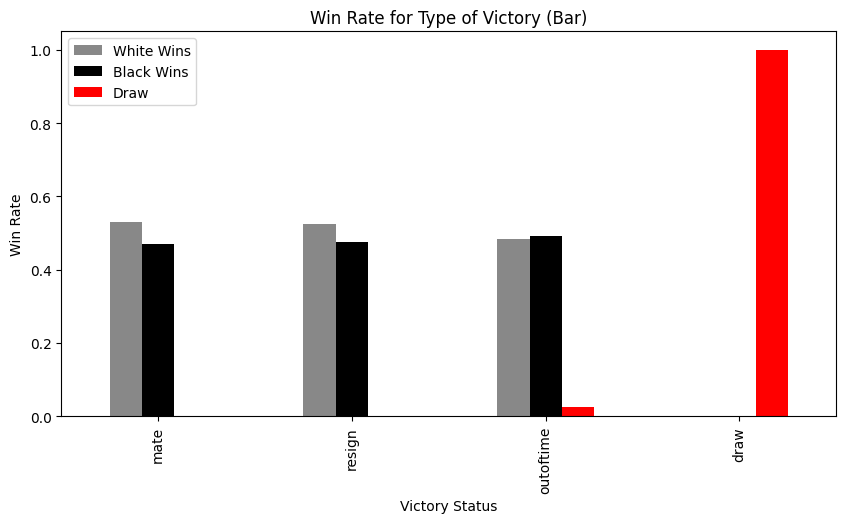

In [23]:
win_rates.plot(kind="bar", figsize=(10,5), color=["#888888", "#000000", "#ff0000"] )
plt.xlabel("Victory Status")
plt.ylabel("Win Rate")
plt.title("Win Rate for Type of Victory (Bar)")
plt.legend(["White Wins", "Black Wins", "Draw"])
plt.show()

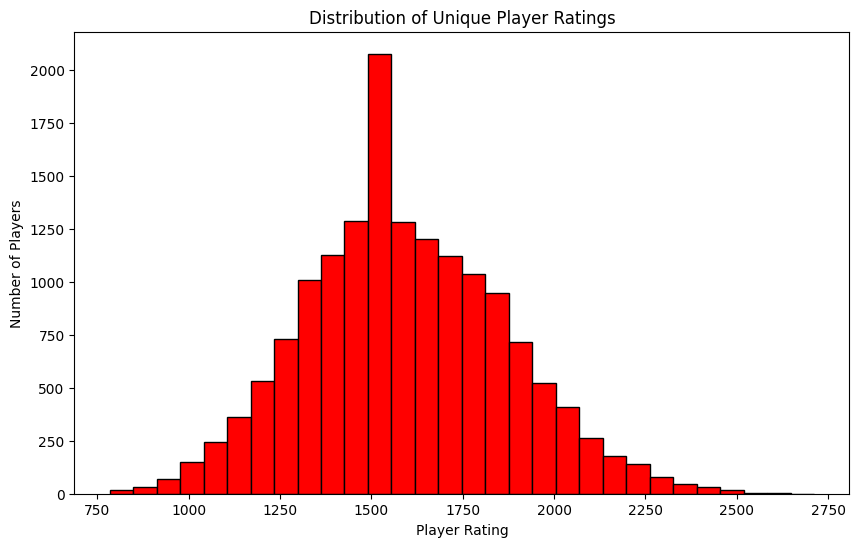

In [24]:
players = pd.DataFrame({
    "player_id": pd.concat([games["white_id"], games["black_id"]], ignore_index=True),
    "rating":    pd.concat([games["white_rating"], games["black_rating"]], ignore_index=True)
})

players_unique = players.groupby("player_id")["rating"].mean().reset_index()

plt.figure(figsize=(10,6))
plt.hist(players_unique["rating"], bins=30, edgecolor="black", color="r")
plt.title("Distribution of Unique Player Ratings")
plt.xlabel("Player Rating")
plt.ylabel("Number of Players")
plt.show()

In [25]:
players_unique["rating"].describe(percentiles=[0.25, 0.5, 0.75, 0.9])

count    15635.000000
mean      1590.697455
std        275.524522
min        784.000000
25%       1407.000000
50%       1564.000000
75%       1778.000000
90%       1954.000000
max       2711.500000
Name: rating, dtype: float64

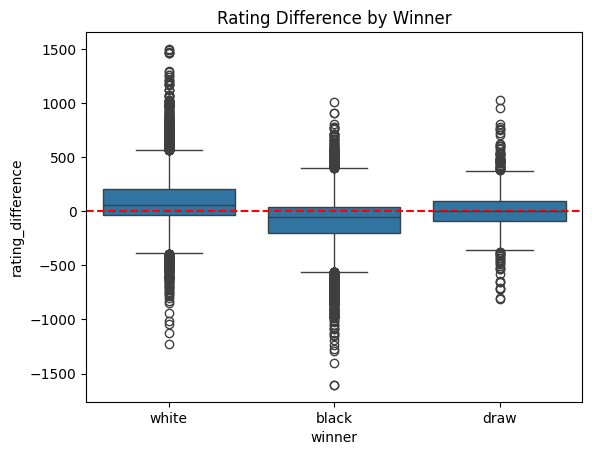

In [26]:
games["rating_difference"] = (games["white_rating"] - games["black_rating"])

sns.boxplot(x='winner', y='rating_difference', data=games)
plt.title('Rating Difference by Winner')
plt.axhline(0, color='red', linestyle='--')
plt.show()

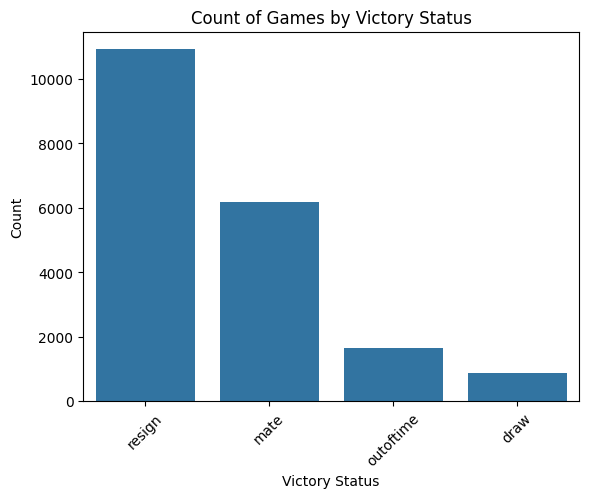

In [27]:
status_counts = games['victory_status'].value_counts()

sns.countplot(x="victory_status", data=games, order=status_counts.index)
plt.xlabel("Victory Status")
plt.ylabel("Count")
plt.title("Count of Games by Victory Status")
plt.xticks(rotation=45)
plt.show()

In [28]:
win_count = games.winner.value_counts()
print(win_count)

winner
white    9792
black    8919
draw      918
Name: count, dtype: int64


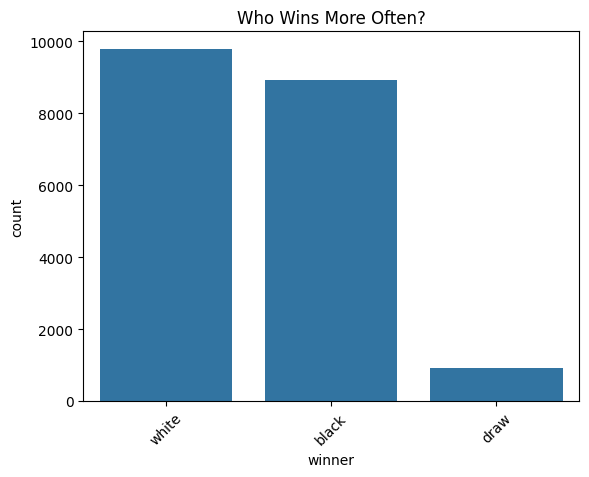

In [29]:
sns.countplot(x='winner', data=games, order=win_count.index)
plt.title('Who Wins More Often?')
plt.xticks(rotation=45)
plt.show()

In [30]:
games["duration_seconds"] = (games["last_move_at"] - games["created_at"]).dt.total_seconds()
games["duration_minutes"] = games["duration_seconds"] / 60

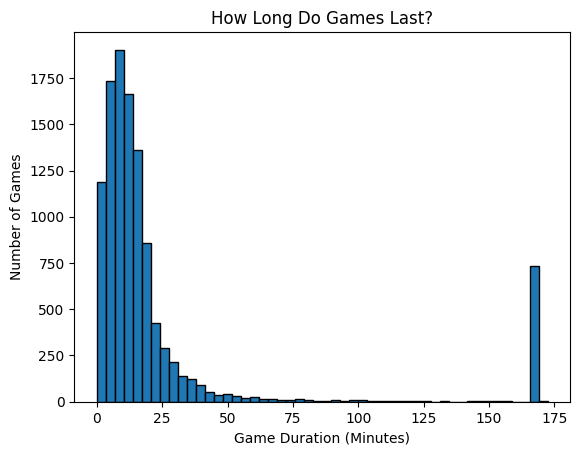

Average game: 14.5 minutes


In [31]:
clean_games = games[(games['duration_minutes'] > 0) & (games['duration_minutes'] < 180)]

plt.hist(clean_games['duration_minutes'], bins=50, edgecolor='black')
plt.xlabel('Game Duration (Minutes)')
plt.ylabel('Number of Games')
plt.title('How Long Do Games Last?')
plt.show()

print(f"Average game: {games['duration_minutes'].mean():.1f} minutes")

Optimization terminated successfully.
         Current function value: 0.614955
         Iterations 5


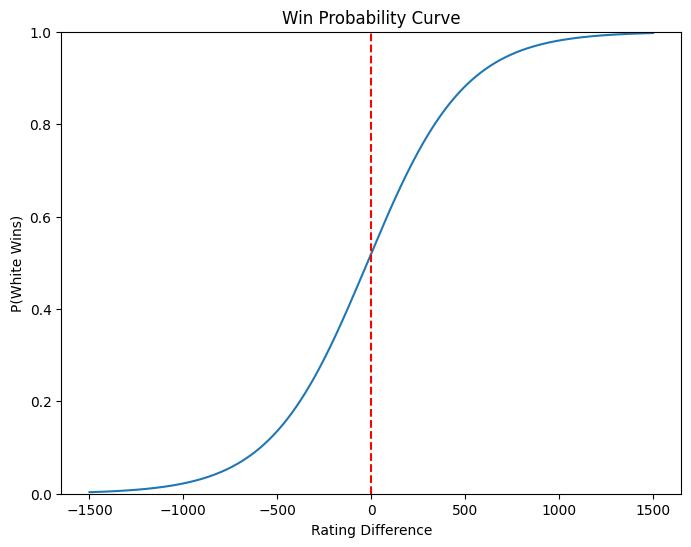

In [32]:
import statsmodels.formula.api as smf

model_data = games.copy()

model_data = model_data[model_data['winner'] != 'draw'].copy()
model_data['white_win'] = (model_data['winner'] == 'white').astype(int)
model_data['rating_diff'] = model_data['white_rating'] - model_data['black_rating']
model = smf.logit("white_win ~ rating_diff", data=model_data).fit()

x_vals = np.linspace(-1500, 1500, 500)
preds = model.predict({"rating_diff": x_vals})

plt.figure(figsize=(8,6))
sns.lineplot(x=x_vals, y=preds)

plt.axvline(0, color='red', linestyle='--')
plt.title("Win Probability Curve")
plt.xlabel("Rating Difference")
plt.ylabel("P(White Wins)")
plt.ylim(0, 1)
plt.show()


## Machine Learning

In [33]:
games.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'opening_eco', 'opening_name', 'duration', 'year',
       'mean_rating', 'white_win', 'black_win', 'draw', 'rating_difference',
       'duration_seconds', 'duration_minutes'],
      dtype='object')

In [34]:
y = games[["rating_difference"]]

In [39]:
x = games[["rated", "turns", "victory_status", "winner", "white_rating", "black_rating"]]
x

,rated,turns,victory_status,winner,white_rating,black_rating
id,,,,,,
YwaFfXra,1,61,1,2,784,970
XJoTQFBp,1,2,3,0,784,1006
APnsyoV7,0,27,3,0,788,1307
516BT5yk,1,120,3,0,1450,789
WRNkn1iH,1,74,3,0,989,791
...,...,...,...,...,...,...
TovD1oTY,1,58,3,0,2422,2386
ZVzhtO1f,1,216,0,1,2393,2438
CDVEwFYa,1,50,3,0,2420,2404


In [40]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()

games["rated"] = lab_enc.fit_transform(games["rated"])
games["victory_status"] = lab_enc.fit_transform(games["victory_status"])
games["winner"] = lab_enc.fit_transform(games["winner"])

x

,rated,turns,victory_status,winner,white_rating,black_rating
id,,,,,,
YwaFfXra,1,61,1,2,784,970
XJoTQFBp,1,2,3,0,784,1006
APnsyoV7,0,27,3,0,788,1307
516BT5yk,1,120,3,0,1450,789
WRNkn1iH,1,74,3,0,989,791
...,...,...,...,...,...,...
TovD1oTY,1,58,3,0,2422,2386
ZVzhtO1f,1,216,0,1,2393,2438
CDVEwFYa,1,50,3,0,2420,2404


In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_xtrain = scaler.fit_transform(x_train)
scaled_xtest = scaler.fit_transform(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def modelresults(predictions):
    print(f"Mean Absolute Error on Model is: {mean_absolute_error(y_test, predictions)}")
    print(f"Root Mean Squared Error on Model is: {np.sqrt(mean_squared_error(y_test, predictions))}")

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(scaled_xtrain, y_train)

In [ ]:
predict_linreg = lin_reg.predict(scaled_xtest)
predict_linreg

In [ ]:
modelresults(predict_linreg)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
svr_model = SVR()

In [ ]:
param_gridsvr = {
    "C": [0.1, 1],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale"]
}

gridsvr = GridSearchCV(svr_model, param_gridsvr, cv=3, n_jobs=-1)
gridsvr.fit(scaled_xtrain, y_train.values.ravel())

In [ ]:
gridsvr = GridSearchCV(svr_model, param_gridsvr)
gridsvr.fit(scaled_xtrain, y_train)

In [ ]:
print(f"Best Parameters for Model are {gridsvr.best_params_}")
predsgridsvr = gridsvr.predict(scaled_xtest)
modelresults(predsgridsvr)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(n_estimators=200)

param_gridrfr = {
    "bootstrap": [True],
    "max_depth": [5, 10, 15],
    "max_features": ["auto", "log2"],
    "n_estimators": [3, 4, 5]
}

gridrfr = GridSearchCV(rf, param_gridrfr)
gridrfr.fit(scaled_xtrain, y_train)


In [ ]:
print(f"Best Parameters for Model are {gridrfr.best_params_}")

In [ ]:
predsgridrfr = gridrfr.predict(scaled_xtest)
modelresults(predsgridrfr)